# Sheet 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

In [2]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel
    mask = (x >= mu - w) & (x <= mu + w)
    return mask * 15 / (16 * w) * (1 - ((x - mu) / w)**2 )**2


Text(0, 0.5, 'Kernel density')

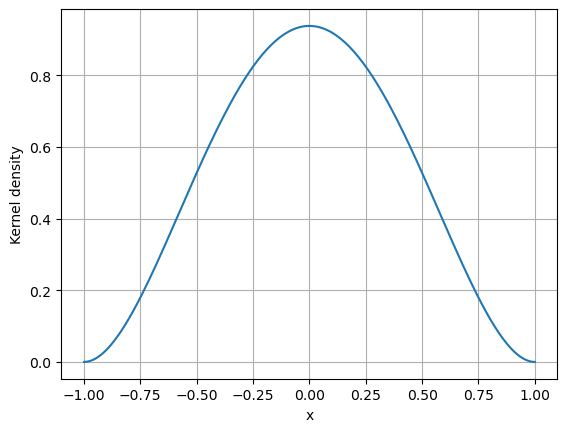

In [3]:
# TODO plot the kernel
mu = 0
w = 1
x = np.linspace(-1, 1, 201)

plt.plot(x, biweight(x, mu, w))
plt.grid()
plt.xlabel('x')
plt.ylabel('Kernel density')

The biweight kernel density function is a bell-shaped function. It is defined as zero outside a specified bandwidth. Within this bandwidth, the biweight kernel exhibits a parabolic shape, peaking at the center. This emphasizes data points closer to the mean while making those further away less impactfull.

(b)

In [4]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

data.shape=(10000,), data50.shape=(50,)


In [5]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel
    return [1 / len(obs) * np.sum(biweight(xi - obs, 0, w)) for xi in x]

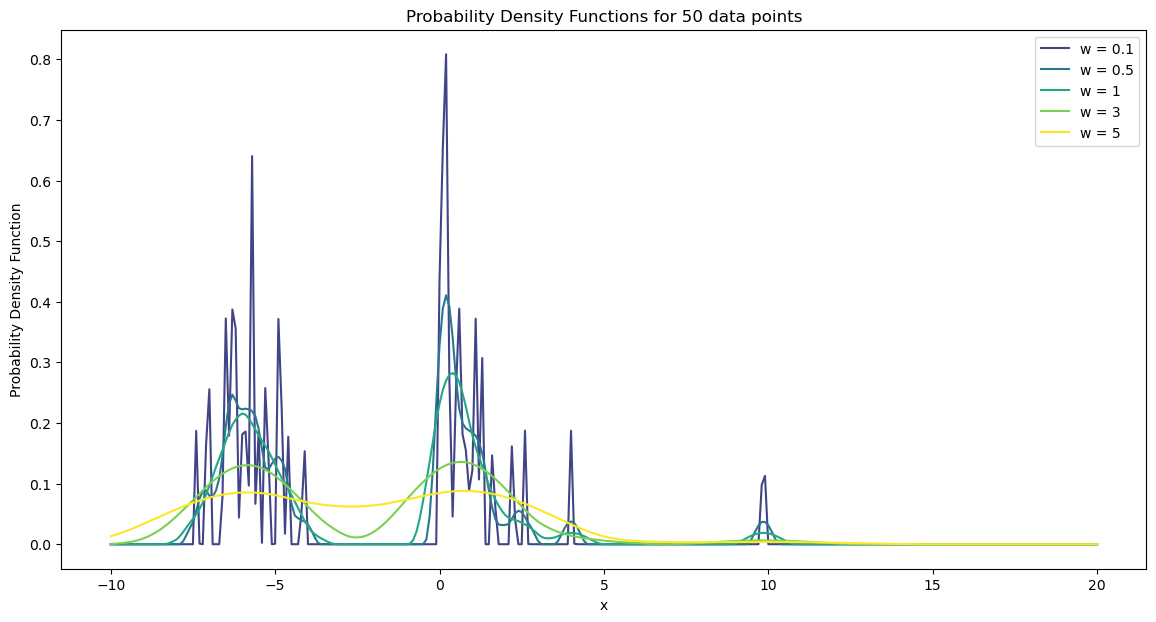

In [6]:
# TODO: compute and plot the kde on the first 50 data points
x = np.linspace(-10, 20, 301)
ws = [0.1, 0.5, 1, 3, 5]
cmap = plt.get_cmap('viridis')
cs = {0.1: 0.2, 0.5: 0.4, 1: 0.6, 3: 0.8, 5:1.0}
plt.figure(figsize=(14, 7))
for w in ws:
    plt.plot(x, kde(x, data50, w), label=f'w = {w}', color=cmap(cs[w]))
plt.legend()
plt.xlabel('x')
plt.ylabel('Probability Density Function')
plt.title('Probability Density Functions for 50 data points')
plt.show()

The bandwidth changes the smoothness of the density estimate. A small bandwidth results in a noisy estimate that closely follows the data and potentially leading to overfitting. In contrast, a large bandwidth produces a smoother estimate that may obscure important features, risking underfitting.

In this case a bandwidth of w ∈ {0.5, 1} seems to be optimal to capture the underlying data without too much over- and underfitting.

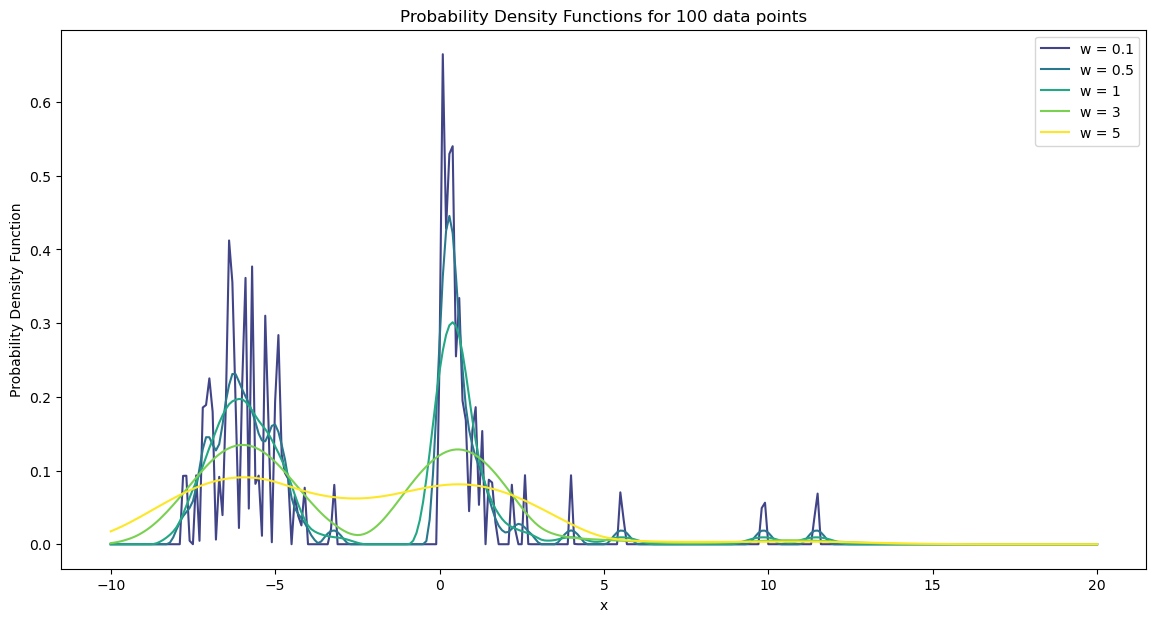

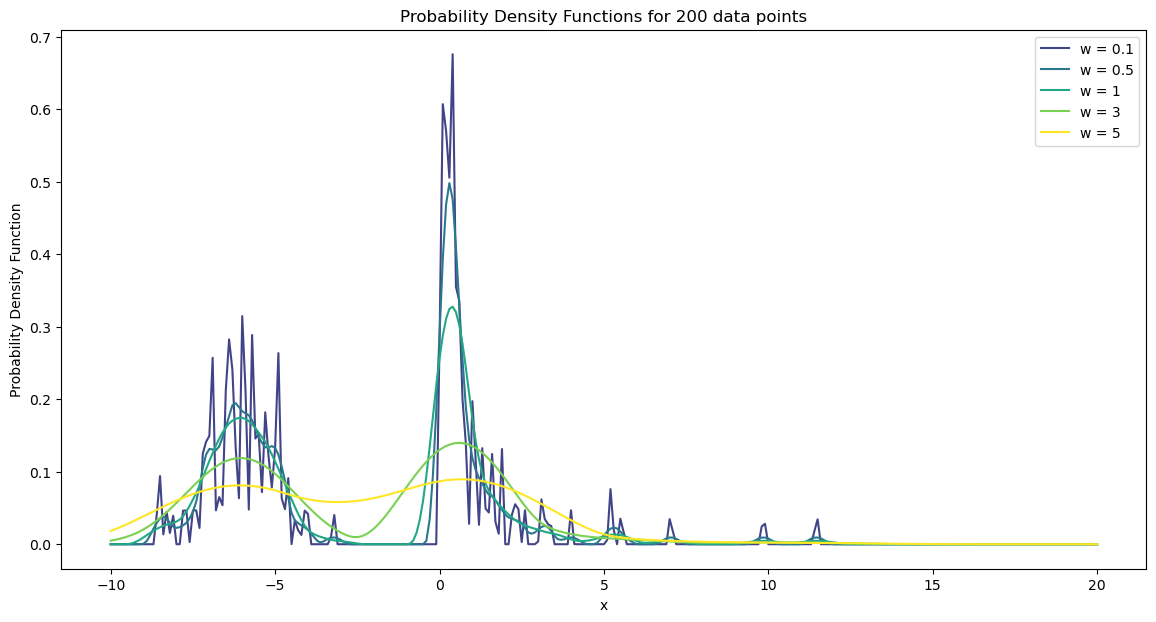

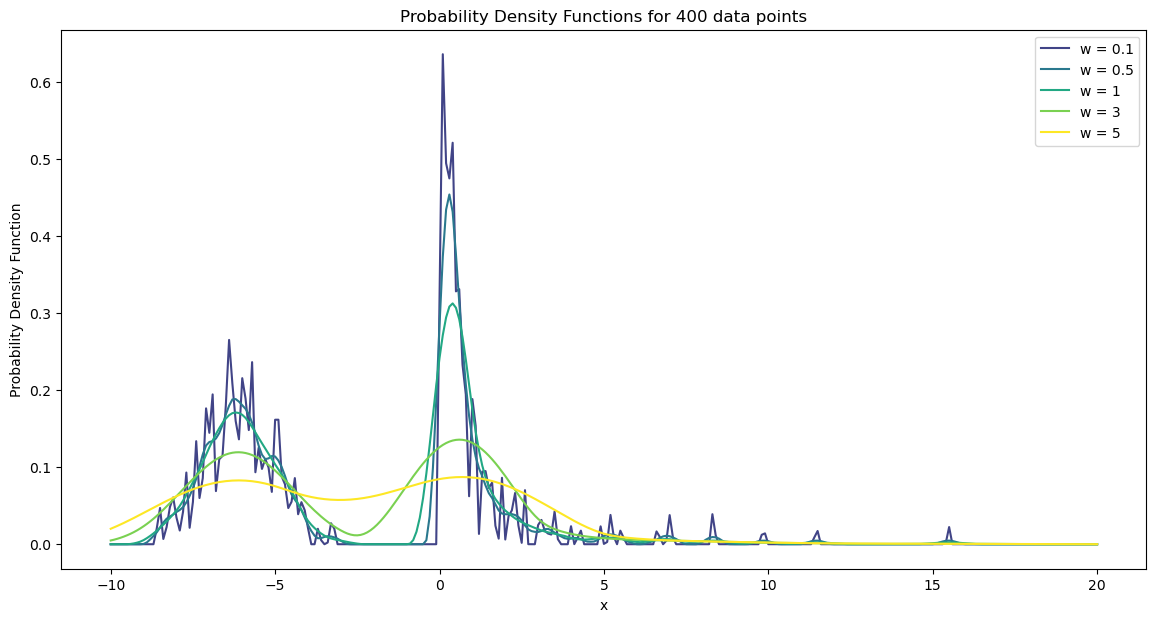

In [7]:
# TODO: explore what happens when you increase the number of points
x = np.linspace(-10, 20, 301)
ws = [0.1, 0.5, 1, 3, 5]
cmap = plt.get_cmap('viridis')
cs = {0.1: 0.2, 0.5: 0.4, 1: 0.6, 3: 0.8, 5:1.0}
datas = [data[:100], data[:200], data[:400]]
idx = 0
number = [100, 200, 400]

for data in datas:
    plt.figure(figsize=(14, 7))
    for w in ws:
        plt.plot(x, kde(x, data, w), label=f'w = {w}', color=cmap(cs[w]))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Probability Density Function')
    plt.title(f'Probability Density Functions for {number[idx]} data points')
    plt.show()
    idx += 1

As the number of data points increases, the density estimate becomes smoother and more accurate. If the bandwidth remains constant, an excessive number of data points may cause the density to appear overly peaked. So the bandwidth needs to be adjusted accordingly.

## 3 Mean-Shift
(b)

In [138]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: start by computing a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    diff = x[:, np.newaxis] - xt[np.newaxis, :] 
    mask = np.abs(diff) < r
    valid_diff_sum = np.sum(np.where(mask, diff, 0), axis=0)
    n = len(x)
    local_means = xt + (1 / n) * valid_diff_sum
    return local_means
    

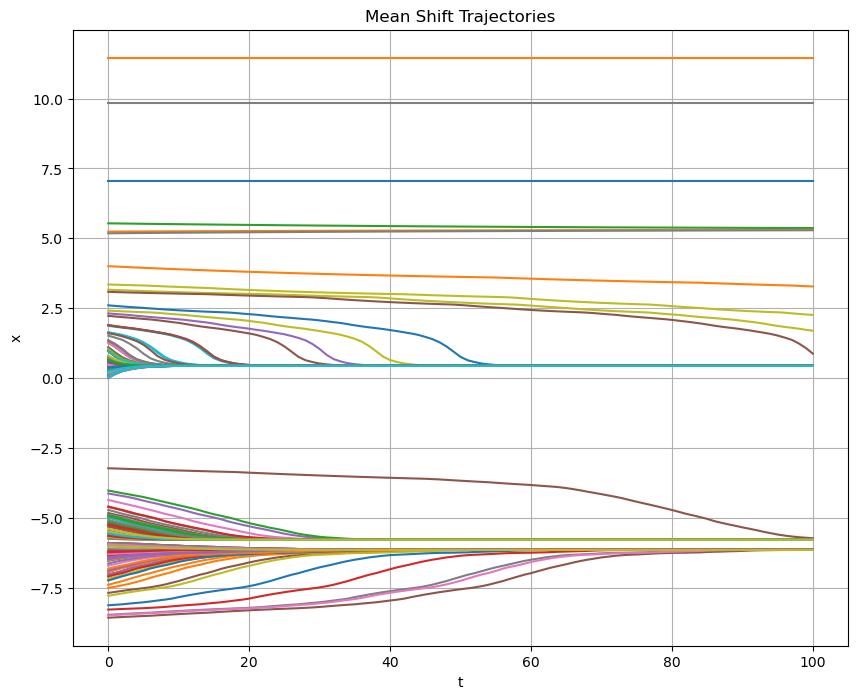

In [146]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    xt = mean_shift_step(x, xt)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break

trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1
# TODO: plot the trajectories
plt.figure(figsize=(10, 8))
for i in range(200):
    t = np.linspace(0, 100, 101)
    plt.plot(t, trajectories[:, i])
plt.title('Mean Shift Trajectories')
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

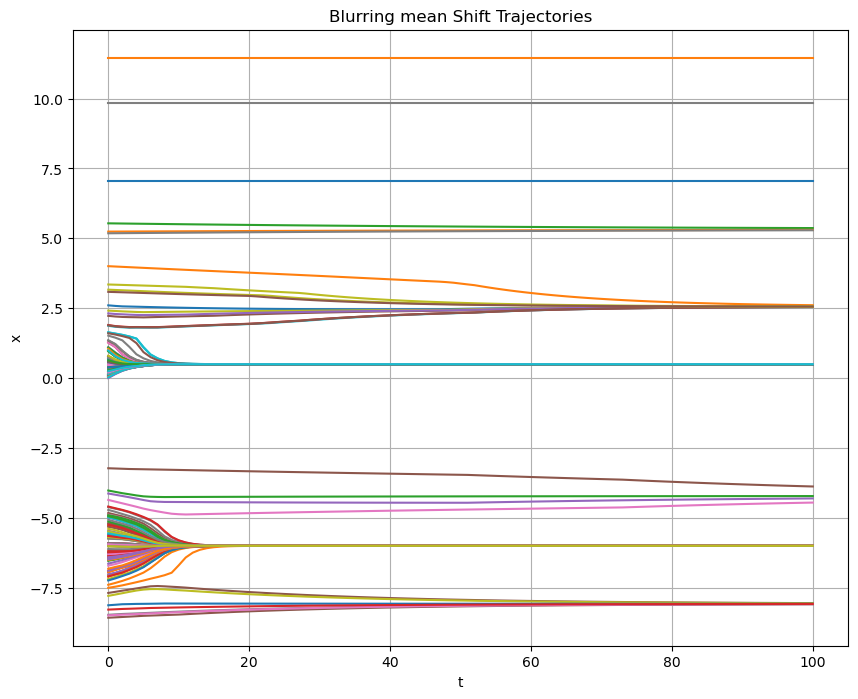

In [149]:
# TODO: repeat the above for "blurring" mean shift
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    xt = mean_shift_step(xt, xt)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break

trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1
# TODO: plot the trajectories
plt.figure(figsize=(10, 8))
for i in range(200):
    t = np.linspace(0, 100, 101)
    plt.plot(t, trajectories[:, i])
plt.title('Blurring mean Shift Trajectories')
plt.xlabel('t')
plt.ylabel('x')
plt.grid()